In [4]:
local torch = require 'torch'
require 'hdf5'
require 'image'

base_path = '/media/wei/DATA/datasets/vlm/'

img_size = {}
img_size['H'] = 58
img_size['W'] = 58

In [5]:
--loading hdf5 data of training examples
dataset_size = 'large'
train_file = hdf5.open(base_path .. 'subgestures/ASL_hand_train_' .. dataset_size .. '.hdf5', 'r')
X_train = train_file:read('X_train'):all()
y_train = train_file:read('y_train'):all()
train_file:close()

N_train = X_train:size(1)
trainset = {};
-- resize to a good size for input to NN
trainset.data = torch.ByteTensor(N_train,3,img_size['H'],img_size['W']):zero()
trainset.label = torch.ByteTensor(N_train,1):zero()
function trainset:size() 
    return self.data:size(1) 
end
for i=1,trainset:size() do 
  -- trainset.data[i] = image.scale(X_train[i], img_size['H'], img_size['W']):byte()
  trainset.data[i] = X_train[i]
  trainset.label[i] = y_train[i] + 1
end
tmp1 = 0
tmp2 = 0
for i=1,trainset:size() do 
    if y_train[i] == 1 then
        tmp1 = tmp1 + 1
    else
        tmp2 = tmp2 + 1
    end
end
print(tmp1, tmp2)
-- save prepceossed dataset into t7
out_path = base_path .. 'subgestures/' .. 'ASL_torch_hand_train_' .. dataset_size .. '.t7'
torch.save(out_path, trainset)

600719	27563	


In [3]:
--Validation set
--loading hdf5 data of validation examples
val_file = hdf5.open(base_path .. 'subgestures/ASL_hand_val.hdf5', 'r')
X_val = val_file:read('X_val'):all()
y_val = val_file:read('y_val'):all()
val_file:close()

N_val = X_val:size(1)

-- name validation test to testset for easier programming in torch
testset = {};
-- resize to a good size for input to NN
testset.data = torch.ByteTensor(N_val,3,img_size['H'],img_size['W']):zero()
testset.label = torch.ByteTensor(N_val,1):zero()
function testset:size() 
    return self.data:size(1) 
end
for i=1,testset:size() do 
  --valset.data[i] = image.scale(X_val[i], img_size['H'], img_size['W']):byte()
  testset.data[i] = X_val[i]
  testset.label[i] = y_val[i] + 1
end
tmp1 = 0
tmp2 = 0
for i=1,testset:size() do 
    if y_val[i] == 1 then
        tmp1 = tmp1 + 1
    else
        tmp2 = tmp2 + 1
    end
end
print(tmp1, tmp2)
-- save prepceossed dataset into t7
out_path = base_path .. 'subgestures/' .. 'ASL_torch_hand_val.t7'
torch.save(out_path, testset)

12501	13775	


In [2]:
--Test set
--loading hdf5 data of test examples
test_file = hdf5.open(base_path .. 'subgestures/ASL_hand_test_gb1113.hdf5', 'r')
X_test = test_file:read('X_test'):all()
y_test = test_file:read('y_test'):all()
test_file:close()

N_test = X_test:size(1)
testset = {};
-- resize to a good size for input to NN
testset.data = torch.ByteTensor(N_test,3,img_size['H'],img_size['W']):zero()
testset.label = torch.ByteTensor(N_test,1):zero()
function testset:size() 
    return self.data:size(1) 
end
for i=1,testset:size() do 
  --testset.data[i] = image.scale(X_test[i], img_size['H'], img_size['W']):byte()
  testset.data[i] = X_test[i]
  testset.label[i] = y_test[i] + 1
end
-- save prepceossed dataset into t7
out_path = base_path .. 'subgestures/' .. 'ASL_torch_hand_test_gb1113.t7'
torch.save(out_path, testset)

N_samples:26276	


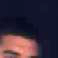

In [6]:
valset = torch.load(base_path .. 'subgestures/' .. 'ASL_torch_hand_val.t7')
print('N_samples:' .. valset.data:size(1))
itorch.image(valset.data[1])

In [7]:
-- save model